## Metastability

Computes the Metastability of orthoganlized low-pass filtered rsMEG Data. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from scipy.signal import hilbert

In [2]:
os.chdir('orth_results') # Execute only once

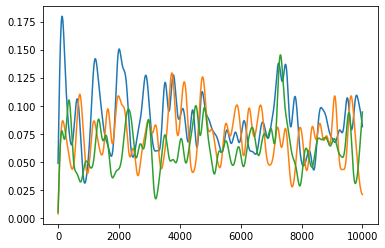

In [9]:
alpha = np.load('Alpha_low-ampl-env.npy') # Loading the low envelope alpha data
plt.plot(alpha[0,:10000]) # Plot three example signals from area 1-3
plt.plot(alpha[1,:10000])

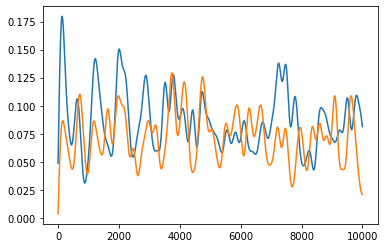

In [14]:
analytic_alpha = hilbert(alpha, axis=-1) # Compute the hilbert transform of alpha
plt.plot(np.real(analytic_alpha[0,:10000])) # Plot real part to look at the signal
plt.plot(np.real(analytic_alpha[1,:10000]))

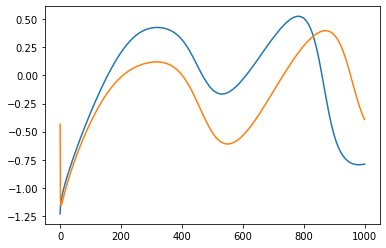

In [17]:
phase = np.angle(analytic_alpha) # Compute phase over time of the analytic signal
plt.plot(phase[0,:1000]) # Plot Phases over time
plt.plot(phase[1,:1000])

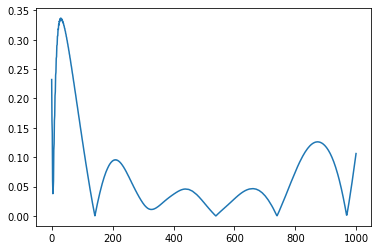

In [25]:
im_phase = phase * 1j
sum_phase = np.sum(im_phase, axis=0)
kuramoto = np.abs(sum_phase) / im_phase.shape[0]
plt.plot(kuramoto[:1000]) # Plot time series of kuramoto parameter

In [30]:
metastability = np.std(kuramoto, ddof=1)
print("The metastabilit of alpha is: ", metastability)

The metastabilit of alpha is:  0.09051150428007987
